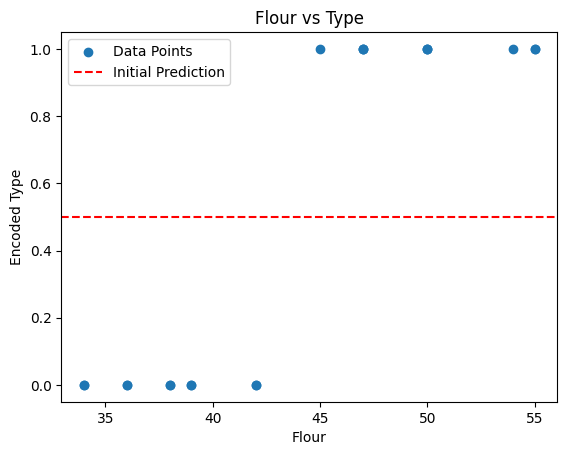

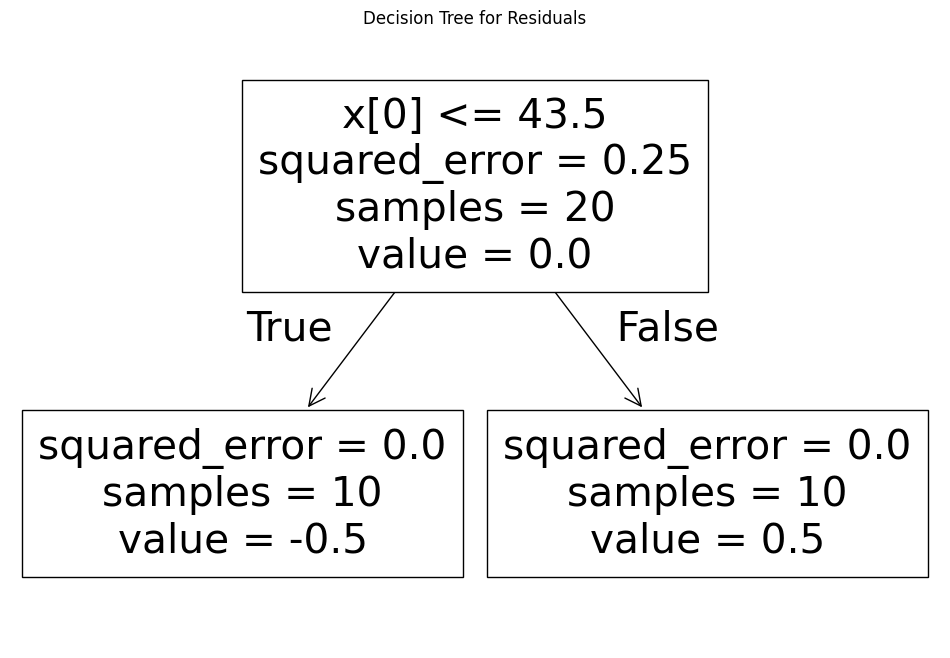

Iteration: 5


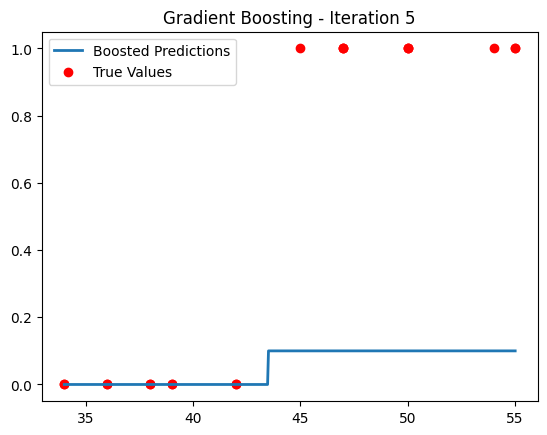

Iteration: 4


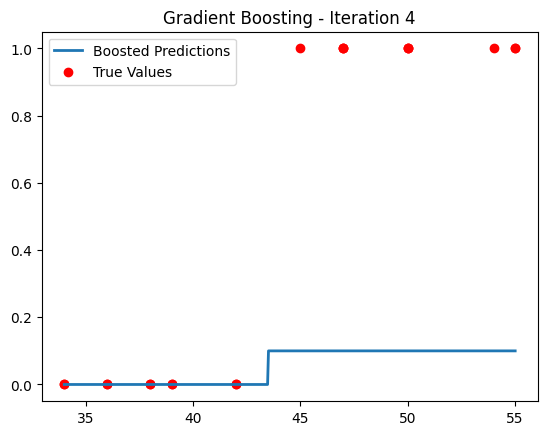

Iteration: 3


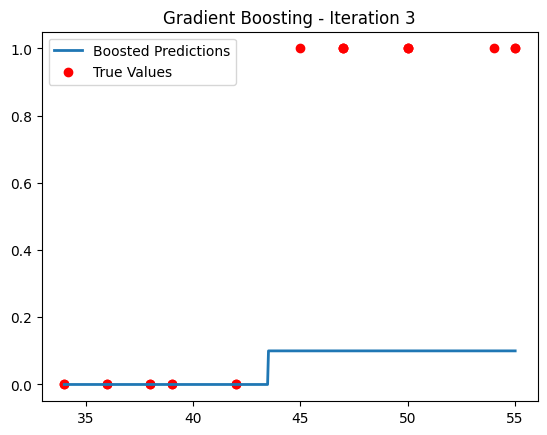

Iteration: 2


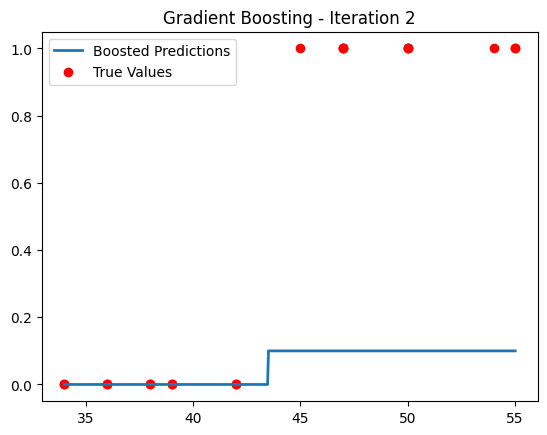

Iteration: 1


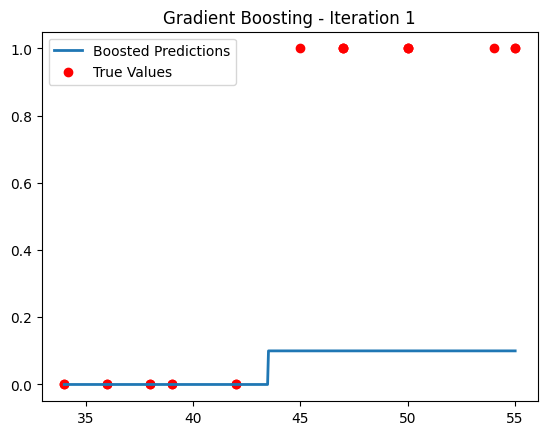

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder

# Load the muffins dataset
df = pd.read_csv('recipes_muffins_cupcakes.csv')  # Replace with your actual file path

# Select features and target
X = df[['Flour']].values  # Using Flour as the feature (you can change this to another ingredient)
y = df['Type'].values     # Type as the target

# Encode the target variable (Type) into numeric values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Initial mean prediction
pred1 = np.mean(y_encoded)
df['pred1'] = pred1
df['res1'] = y_encoded - df['pred1']

# Plotting the initial data
plt.scatter(df['Flour'], y_encoded, label='Data Points')
plt.axhline(y=pred1, color='red', label='Initial Prediction', linestyle='--')
plt.title('Flour vs Type')
plt.xlabel('Flour')
plt.ylabel('Encoded Type')
plt.legend()
plt.show()

# Train a Decision Tree Regressor
tree1 = DecisionTreeRegressor(max_leaf_nodes=8, random_state=42)
tree1.fit(X, df['res1'])

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree1)
plt.title('Decision Tree for Residuals')
plt.show()

# Update predictions
df['pred2'] = pred1 + tree1.predict(X)
df['res2'] = y_encoded - df['pred2']

# Gradient Boosting function
def gradient_boost(X, y, number, lr, count=1, regs=[], foo=None):
    if number == 0:
        return
    else:
        # Calculate the residuals or use the original y values
        if count > 1:
            y = y - regs[-1].predict(X)
        else:
            foo = y

        # Fit a new tree to the residuals
        tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
        tree_reg.fit(X, y)
        regs.append(tree_reg)

        # Make predictions
        x1 = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
        y_pred = sum(lr * regressor.predict(x1) for regressor in regs)

        # Plotting
        print(f'Iteration: {number}')
        plt.figure()
        plt.plot(x1, y_pred, linewidth=2, label='Boosted Predictions')
        plt.scatter(X, foo, color='red', label='True Values')
        plt.title(f'Gradient Boosting - Iteration {number}')
        plt.legend()
        plt.show()

        # Recursive call
        gradient_boost(X, y, number-1, lr, count+1, regs, foo=foo)

# Run gradient boosting
gradient_boost(X, y_encoded, number=5, lr=0.1)
